In [2]:
import torch
import torch.nn as nn
from torch.optim import SGD
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# ! wget www.di.ens.fr/~lelarge/MNIST.tar.gz

In [5]:
! ls

1.ipynb			  MNIST		   MNIST.tar.gz
Lineaer_Regression.ipynb  MNIST_MLP.ipynb  MNIST.tar.gz.1


In [6]:
train_filepath = 'MNIST/processed/training.pt'
test_filepath = 'MNIST/processed/test.pt'

x, y = torch.load(train_filepath)


/tmp/ipykernel_117605/1500440429.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  x, y = torch.load(train_filepath)


In [7]:
x.shape


torch.Size([60000, 28, 28])

In [8]:
y.shape


torch.Size([60000])

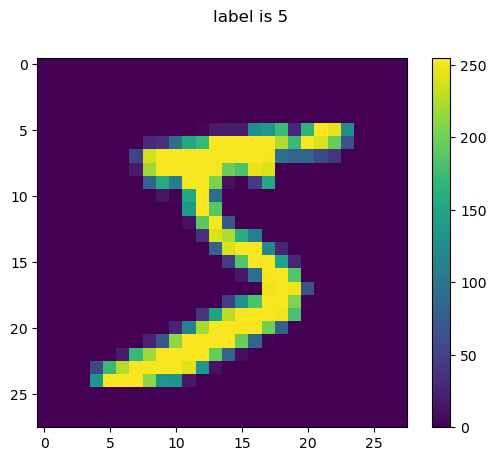

In [9]:
plt.imshow(x[0].numpy())
plt.suptitle(f'label is {y[0]}')
plt.colorbar()

In [10]:
# lets keep the x and y variables and look at some other variables
y_original = torch.tensor([2, 4, 3, 0, 1])
y_original

tensor([2, 4, 3, 0, 1])

In [11]:
y_original.shape

torch.Size([5])

In [12]:
y_one_hot_encoded = F.one_hot(y_original)
print(y_one_hot_encoded)

tensor([[0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0]])


In [13]:
y_one_hot_encoded.shape

torch.Size([5, 5])

In [14]:
print(y)
print(y.shape)

tensor([5, 0, 4,  ..., 5, 6, 8])
torch.Size([60000])


In [15]:
y_new = F.one_hot(y, num_classes=10)
y_new

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 1, 0]])

In [16]:
print(y_new.shape)

torch.Size([60000, 10])


images are 28 x 28 pixels, but we want to turn the images (the xs) into a vector

In [17]:
x.shape

torch.Size([60000, 28, 28])

In [18]:
first_dim = 28
second_dim = 28
x.view(-1, first_dim * second_dim).shape

torch.Size([60000, 784])

In [19]:
x.shape

torch.Size([60000, 28, 28])

In [20]:
x

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [21]:
x_new = x.view(-1, first_dim * second_dim)
x_new

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.uint8)

In [22]:
print(x.shape)
print(y.shape)

torch.Size([60000, 28, 28])
torch.Size([60000])


In [23]:
n_examples, first_dim, second_dim = x.shape
n_classes = y.shape[0]

In [24]:
class MNIST_Dataset(Dataset):
    def __init__(self, filepath):
        self.x, self.y = torch.load(filepath)
        self.x = self.x / 255
        # originally y.shape = n_examples
        self.y = F.one_hot(self.y, num_classes=10).float()
        # now y.shape = [n_examples, num_classes]

    def __len__(self):
        return self.x.shape[0]
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    

In [25]:
train_dataset = MNIST_Dataset(train_filepath)
test_dataset = MNIST_Dataset(test_filepath)

/tmp/ipykernel_117605/303451288.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.x, self.y = torch.load(filepath)


In [26]:
print(train_dataset)

In [27]:
print(len(train_dataset))

60000


In [28]:
xs, ys = train_dataset[0:4]
print(x.shape)
print(y.shape)

torch.Size([60000, 28, 28])
torch.Size([60000])


In [29]:
train_dataloader = DataLoader(train_dataset, batch_size=5)
print(train_dataloader)

In [30]:
for x_batch, y_batch in train_dataloader:
    print(f'x_batch.shape: {x_batch.shape}')
    # x_batch has shape [batch_size, first_dim, second_dim]
    print(f'y_batch.shape: {y_batch.shape}')
    # y has shape [batch_size, num_targets]

x_batch.shape: torch.Size([5, 28, 28])
y_batch.shape: torch.Size([5, 10])
x_batch.shape: torch.Size([5, 28, 28])
y_batch.shape: torch.Size([5, 10])
x_batch.shape: torch.Size([5, 28, 28])
y_batch.shape: torch.Size([5, 10])
x_batch.shape: torch.Size([5, 28, 28])
y_batch.shape: torch.Size([5, 10])
x_batch.shape: torch.Size([5, 28, 28])
y_batch.shape: torch.Size([5, 10])
x_batch.shape: torch.Size([5, 28, 28])
y_batch.shape: torch.Size([5, 10])
x_batch.shape: torch.Size([5, 28, 28])
y_batch.shape: torch.Size([5, 10])
x_batch.shape: torch.Size([5, 28, 28])
y_batch.shape: torch.Size([5, 10])
x_batch.shape: torch.Size([5, 28, 28])
y_batch.shape: torch.Size([5, 10])
x_batch.shape: torch.Size([5, 28, 28])
y_batch.shape: torch.Size([5, 10])
x_batch.shape: torch.Size([5, 28, 28])
y_batch.shape: torch.Size([5, 10])
x_batch.shape: torch.Size([5, 28, 28])
y_batch.shape: torch.Size([5, 10])
x_batch.shape: torch.Size([5, 28, 28])
y_batch.shape: torch.Size([5, 10])
x_batch.shape: torch.Size([5, 28, 28])

In [31]:
class MLP(nn.Module):
    def __init__(self, num_features, num_targets, n_hidden, n_layers):
        super().__init__()
    
        self.num_features = num_features

        self.input_layer = nn.Sequential(
            nn.Linear(num_features, n_hidden),
            nn.ReLU()
        )
        
        self.layers = nn.ModuleList()
        for i in range(n_layers):
            self.layers.append(
                nn.Sequential(
                    nn.Linear(n_hidden, n_hidden),
                              nn.ReLU()
                              ))

        self.output_layer = nn.Sequential(
            nn.Linear(n_hidden, num_targets),
                                     nn.ReLU())
    
    def forward(self, x):
        # print(f'x.shape: {x.shape}')
        x = x.view(-1, self.num_features)
        # print(f'x.shape: {x.shape}')
        x = self.input_layer(x)

        for layer in self.layers:
            x = layer(x)
        x = self.output_layer(x)
        return x.squeeze()
    

In [32]:
print(f'y.shape: {y.shape}')
num_classes = 10
n_features = x.shape[1] * x.shape[2]
n_targets = num_classes # y.shape[0]
print(f'n_features: {n_features}')
print(f'n_targets: {n_targets}')


y.shape: torch.Size([60000])
n_features: 784
n_targets: 10


In [33]:
model = MLP(num_features=n_features, num_targets=n_targets, n_hidden=16, n_layers=2)

L = nn.CrossEntropyLoss()

for x_batch, y_batch in train_dataloader:
    print(f'x_batch.shape: {x_batch.shape}')
    # x_batch has shape [batch_size, first_dim, second_dim]
    print(f'y_batch.shape: {y_batch.shape}')
    # y has shape [batch_size, num_targets]
    model_out = model(x_batch)
    print(f'model_out.shape: {model_out.shape}')
    print(f'y_batch.shape: {y_batch.shape}')

    loss = L(model_out, y_batch)
    print(f'loss: {loss}')


x_batch.shape: torch.Size([5, 28, 28])
y_batch.shape: torch.Size([5, 10])
model_out.shape: torch.Size([5, 10])
y_batch.shape: torch.Size([5, 10])
loss: 2.27437162399292
x_batch.shape: torch.Size([5, 28, 28])
y_batch.shape: torch.Size([5, 10])
model_out.shape: torch.Size([5, 10])
y_batch.shape: torch.Size([5, 10])
loss: 2.3262712955474854
x_batch.shape: torch.Size([5, 28, 28])
y_batch.shape: torch.Size([5, 10])
model_out.shape: torch.Size([5, 10])
y_batch.shape: torch.Size([5, 10])
loss: 2.3644192218780518
x_batch.shape: torch.Size([5, 28, 28])
y_batch.shape: torch.Size([5, 10])
model_out.shape: torch.Size([5, 10])
y_batch.shape: torch.Size([5, 10])
loss: 2.3376224040985107
x_batch.shape: torch.Size([5, 28, 28])
y_batch.shape: torch.Size([5, 10])
model_out.shape: torch.Size([5, 10])
y_batch.shape: torch.Size([5, 10])
loss: 2.2615513801574707
x_batch.shape: torch.Size([5, 28, 28])
y_batch.shape: torch.Size([5, 10])
model_out.shape: torch.Size([5, 10])
y_batch.shape: torch.Size([5, 10])
l

In [37]:
def train_MLP(n_epochs, train_dataloader):
    model = MLP(num_features=n_features, num_targets=n_targets, n_hidden=16, n_layers=2)
    L = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters())

    for epoch in range(n_epochs):
        print(f'epoch = {epoch}')
        for x_batch, y_batch in train_dataloader:
            # print(f'x_batch.shape: {x_batch.shape}')
            # x_batch has shape [batch_size, first_dim, second_dim]
            # print(f'y_batch.shape: {y_batch.shape}')
            # y has shape [batch_size, num_targets]
            model_out = model(x_batch)
            # print(f'model_out.shape: {model_out.shape}')
            # print(f'y_batch.shape: {y_batch.shape}')

            loss = L(model_out, y_batch)
            print(f'loss: {loss}')

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    return model

In [38]:
len(train_dataloader)

12000

In [40]:
model = train_MLP(n_epochs=2, train_dataloader=train_dataloader)

epoch = 0
loss: 2.299455165863037
loss: 2.300596237182617
loss: 2.2410597801208496
loss: 2.3436636924743652
loss: 2.332245349884033
loss: 2.2973856925964355
loss: 2.3077356815338135
loss: 2.3085522651672363
loss: 2.3092076778411865
loss: 2.271564483642578
loss: 2.295619249343872
loss: 2.3323631286621094
loss: 2.3026537895202637
loss: 2.309516191482544
loss: 2.3022408485412598
loss: 2.342539072036743
loss: 2.342357873916626
loss: 2.286808490753174
loss: 2.3234713077545166
loss: 2.3017992973327637
loss: 2.311309814453125
loss: 2.3017725944519043
loss: 2.3050758838653564
loss: 2.3172268867492676
loss: 2.3399040699005127
loss: 2.3166797161102295
loss: 2.250516891479492
loss: 2.2097325325012207
loss: 2.322497844696045
loss: 2.2633070945739746
loss: 2.326132297515869
loss: 2.2976043224334717
loss: 2.2777130603790283
loss: 2.310213565826416
loss: 2.309447765350342
loss: 2.264451265335083
loss: 2.278380870819092
loss: 2.3447768688201904
loss: 2.2612757682800293
loss: 2.3015646934509277
loss: 2

In [41]:
x_test, y_test = test_dataset[:2000]
y_test

tensor([[0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [42]:
preds = model(x_test)
print(preds)
print(preds.shape)

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  8.4808,  0.0000,  1.0613],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  1.7021,  1.7028],
        [ 0.0000,  0.0000,  0.0000,  ...,  2.2848,  2.1699, 17.1459],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  1.4256,  4.4294]],
       grad_fn=<SqueezeBackward0>)
torch.Size([2000, 10])


In [43]:
preds = preds.argmax(axis=1)
print(preds)
print(preds.shape)

tensor([7, 0, 0,  ..., 3, 9, 5])
torch.Size([2000])


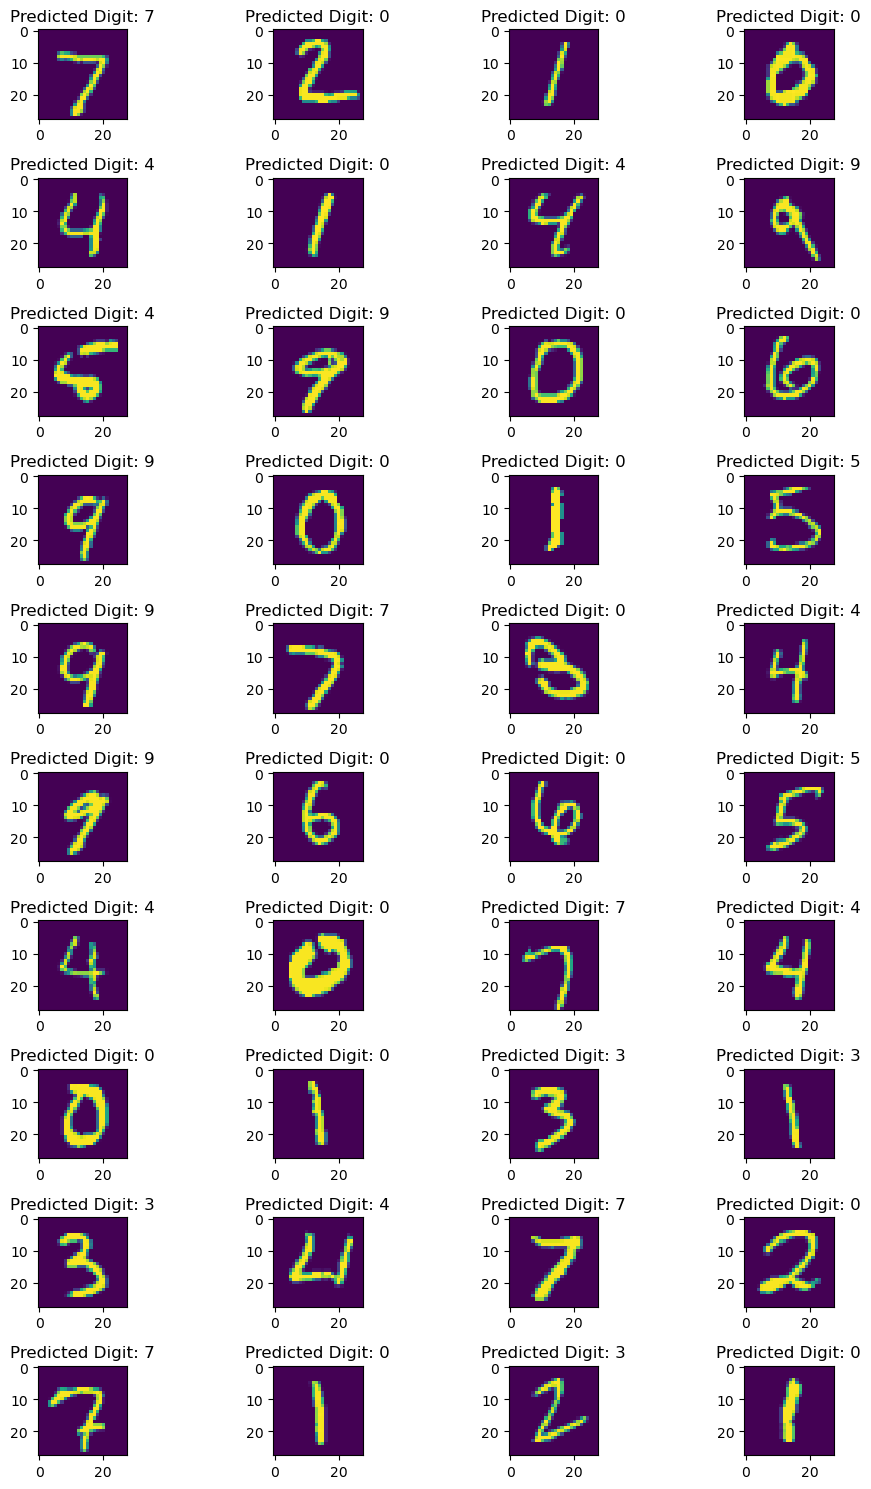

In [44]:
fig, ax = plt.subplots(10,4,figsize=(10,15))
for i in range(40):
    #activate the i+1 subplot
    plt.subplot(10,4,i+1)
    plt.imshow(x_test[i])
    yhat = preds[i]
    plt.title(f'Predicted Digit: {yhat}')
fig.tight_layout()
plt.show()